<a href="https://colab.research.google.com/github/Shams-Sajid-Rahman/STOCK-PRICE-PREDICTION-USING-ML-REGRESSION/blob/main/Stock_Price_Prediction_Using_KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV stock data here
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()  # Display first few rows


Saving TSLA_Test.csv to TSLA_Test (1).csv
Saving TSLA_Train.csv to TSLA_Train (1).csv
Saving TSLA_Validation.csv to TSLA_Validation (1).csv


,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,2016-10-05,212.24,213.15,208.12,208.46,1580397,0,TSLA
1,2016-10-06,202.46,204.21,200.21,201.00,4506877,0,TSLA
2,2016-10-07,201.00,201.32,195.80,196.61,2944927,0,TSLA
3,2016-10-10,201.35,204.14,199.66,200.95,2894705,0,TSLA
4,2016-10-11,201.85,202.20,198.31,200.10,2237785,0,TSLA


In [4]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Handle missing values if any
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')


/tmp/ipython-input-431307444.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
/tmp/ipython-input-431307444.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")


Training samples: (223, 4), Testing samples: (56, 4)


In [6]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)

# Predict on test data
y_pred_knn = best_knn.predict(X_test)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [8]:
print("KNN Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.4f}")


KNN Regression Metrics:
MAE: 46.5032
MSE: 3251.9145
RMSE: 57.0256
R² Score: 0.2017


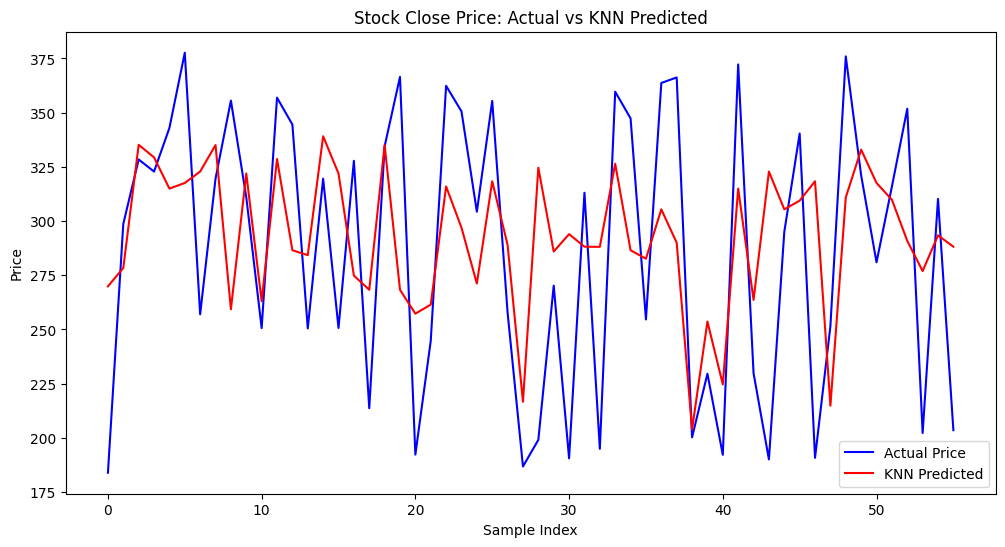

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Price', color='blue')
plt.plot(y_pred_knn, label='KNN Predicted', color='red')
plt.title('Stock Close Price: Actual vs KNN Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV stock data here
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()  # Display first few rows


Saving AAPL_Test.csv to AAPL_Test.csv
Saving AAPL_Train.csv to AAPL_Train.csv
Saving AAPL_Validation.csv to AAPL_Validation.csv


,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,2012-11-19,69.859,73.320,69.752,73.090,227389256,0,AAPL
1,2012-11-20,73.892,73.896,71.650,72.470,177617260,0,AAPL
2,2012-11-21,72.901,73.302,71.911,72.569,103124238,0,AAPL
3,2012-11-23,73.279,73.901,72.690,73.837,75416902,0,AAPL
4,2012-11-26,74.406,76.227,74.123,76.166,174030221,0,AAPL


In [ ]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Handle missing values if any
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')


/tmp/ipython-input-431307444.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
/tmp/ipython-input-431307444.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")


Training samples: (1004, 4), Testing samples: (251, 4)


In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)

# Predict on test data
y_pred_knn = best_knn.predict(X_test)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
print("KNN Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.4f}")


KNN Regression Metrics:
MAE: 16.6813
MSE: 439.8126
RMSE: 20.9717
R² Score: 0.4624


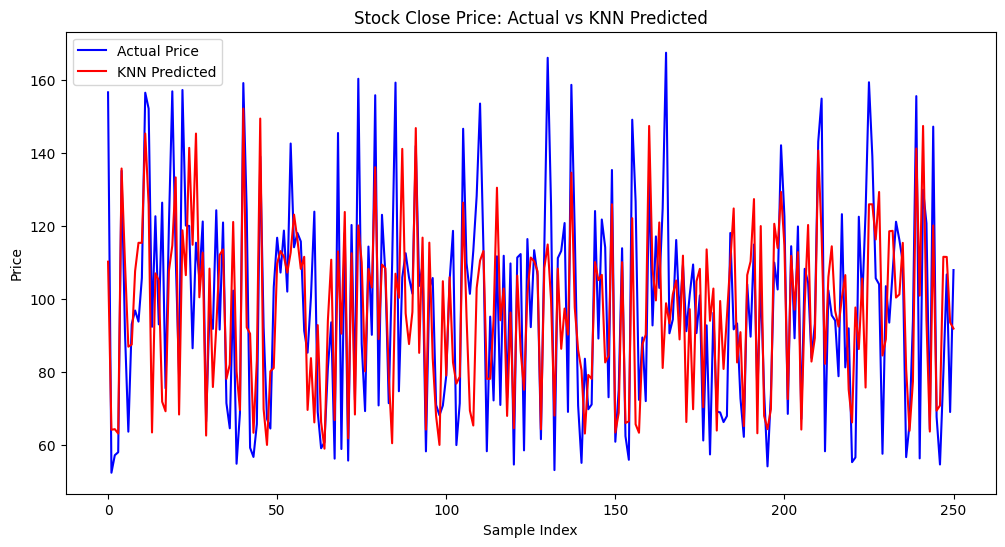

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Price', color='blue')
plt.plot(y_pred_knn, label='KNN Predicted', color='red')
plt.title('Stock Close Price: Actual vs KNN Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV stock data here
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()  # Display first few rows


Saving FB_Test.csv to FB_Test.csv
Saving FB_Train.csv to FB_Train.csv
Saving FB_Validation.csv to FB_Validation.csv


,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,2017-01-18,128.41,128.43,126.84,127.92,12266776,0,FB
1,2017-01-19,128.23,128.35,127.45,127.55,10576325,0,FB
2,2017-01-20,128.10,128.48,126.78,127.04,18415194,0,FB
3,2017-01-23,127.31,129.25,126.95,128.93,15860639,0,FB
4,2017-01-24,129.38,129.90,128.38,129.37,14793943,0,FB


In [ ]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Handle missing values if any
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')


/tmp/ipython-input-431307444.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
/tmp/ipython-input-431307444.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")


Training samples: (166, 4), Testing samples: (42, 4)


In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)

# Predict on test data
y_pred_knn = best_knn.predict(X_test)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
print("KNN Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.4f}")


KNN Regression Metrics:
MAE: 12.9653
MSE: 233.6933
RMSE: 15.2870
R² Score: -0.2199


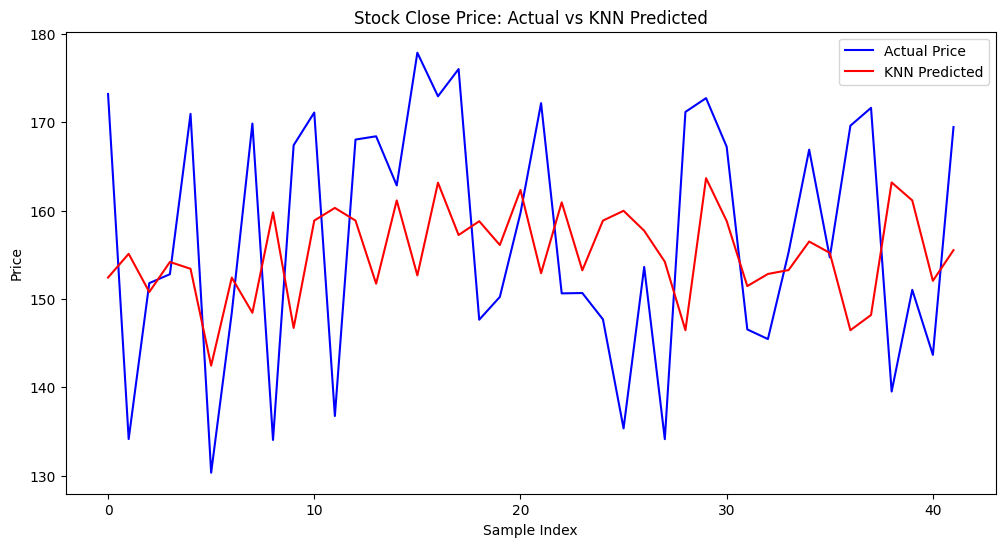

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Price', color='blue')
plt.plot(y_pred_knn, label='KNN Predicted', color='red')
plt.title('Stock Close Price: Actual vs KNN Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV stock data here
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()  # Display first few rows


Saving MSFT_Test.csv to MSFT_Test.csv
Saving MSFT_Train.csv to MSFT_Train.csv
Saving MSFT_Validation.csv to MSFT_Validation.csv


,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,2013-02-12,24.534,24.639,24.421,24.534,40898851,0,MSFT
1,2013-02-13,24.579,24.736,24.534,24.667,47404263,0,MSFT
2,2013-02-14,24.570,24.693,24.525,24.676,37117102,0,MSFT
3,2013-02-15,24.676,24.780,24.534,24.649,56424545,0,MSFT
4,2013-02-19,24.756,24.922,24.667,24.884,43734984,0,MSFT


In [ ]:
# Select features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features]
y = df[target]

# Handle missing values if any
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')


/tmp/ipython-input-431307444.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
/tmp/ipython-input-431307444.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")


Training samples: (958, 4), Testing samples: (240, 4)


In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)

# Predict on test data
y_pred_knn = best_knn.predict(X_test)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
print("KNN Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.4f}")


KNN Regression Metrics:
MAE: 8.7510
MSE: 122.4469
RMSE: 11.0656
R² Score: 0.2889


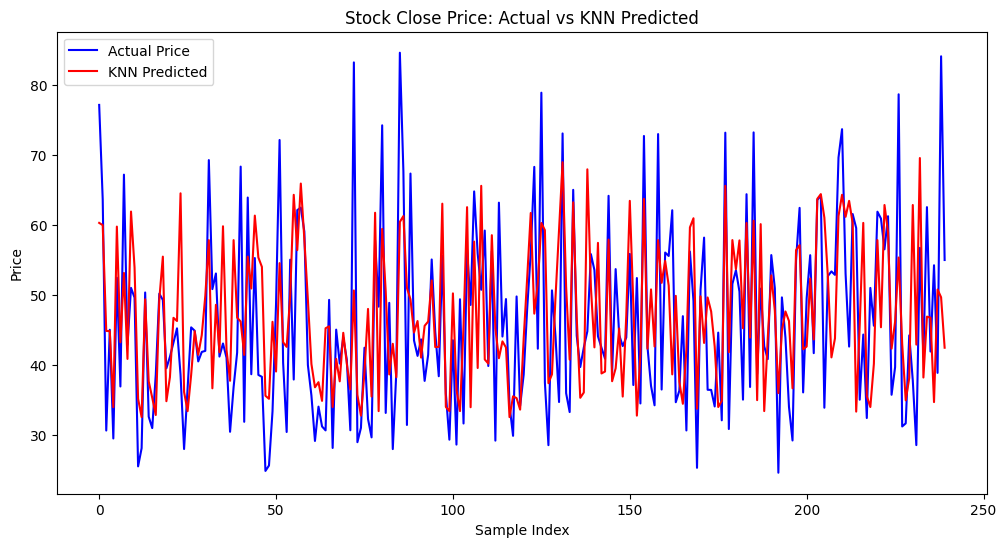

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Price', color='blue')
plt.plot(y_pred_knn, label='KNN Predicted', color='red')
plt.title('Stock Close Price: Actual vs KNN Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()
